# INF-0619 - Trabalho Final
### Tema:
* Análise da Gravidade de Artrose no Joelho

### Grupo:
* Elcio
* Hamilton
* Mauricio
* Renato
* Tomais

## Instruções
#### Baixar o dataset https://drive.google.com/drive/folders/16kCVi1XH165MrqdV1PawyDfYvxSOVjio?usp=sharing
#### Descompactar o arquivo baixado no mesmo diretório deste jupyter notebook

In [12]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train_path= 'dataset'+ os.sep + 'train'
val_path= 'dataset'+ os.sep + 'val'
test_path= 'dataset'+ os.sep + 'test'

In [14]:
def findClassName (row):   
    if row['ClassId'] == 0 :
        return 'Saudavel'
    if row['ClassId'] == 1 :
        return 'Duvidoso'
    if row['ClassId'] == 2 :
        return 'Minimo'
    if row['ClassId'] == 3 :
        return 'Moderado'
    if row['ClassId'] == 4 :
        return 'Severo'

## Análise Training Set

In [16]:
train_image_names = glob.glob(train_path + '/*/*.png')
print("Total number of training images: ", len(train_image_names))
train_image_names = pd.Series(train_image_names)

# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split(os.sep)[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

train_df['ClassName'] = train_df.apply(lambda row: findClassName(row), axis=1)

train_df.groupby('ClassName').count()

Total number of training images:  5781


,Filename,ClassId
ClassName,,
Duvidoso,1046,1046
Minimo,1516,1516
Moderado,757,757
Saudavel,2289,2289
Severo,173,173


<AxesSubplot:xlabel='ClassName'>

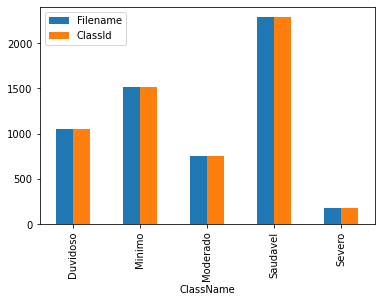

In [17]:
train_df.groupby('ClassName').count().plot.bar()

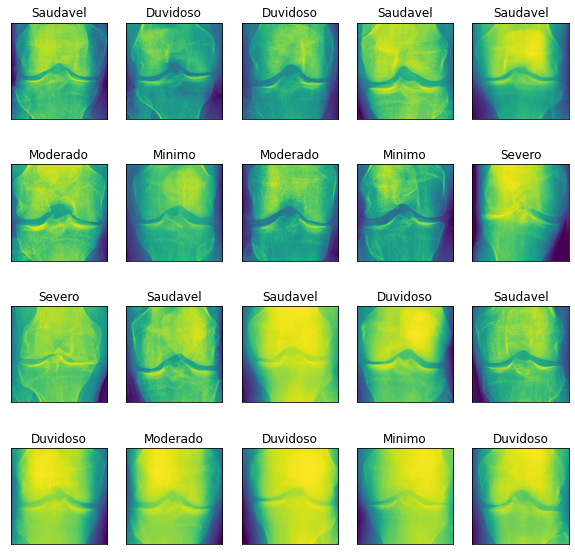

In [18]:
plot_df = train_df.sample(20).reset_index()
plt.figure(figsize=(10, 10))

for i in range(20):
    img_name = plot_df.loc[i, 'Filename']
    label_id = plot_df.loc[i, 'ClassId']
    label_name = plot_df.loc[i, 'ClassName']
    plt.subplot(4,5,i+1)
    plt.imshow(plt.imread(train_path + os.sep + str(label_id) + os.sep + img_name))
    plt.title(label_name)
    plt.xticks([])
    plt.yticks([])

## Análise Validation Set

In [19]:
val_image_names = glob.glob(val_path + '/*/*.png')
print("Total number of validation images: ", len(val_image_names))
val_image_names = pd.Series(val_image_names)

# val_df: a dataframe with 2 field: Filename, ClassId
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map(lambda img_name: img_name.split(os.sep)[-1])

# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

val_df['ClassName'] = val_df.apply(lambda row: findClassName(row), axis=1)

val_df.groupby('ClassName').count()

Total number of validation images:  826


,Filename,ClassId
ClassName,,
Duvidoso,153,153
Minimo,212,212
Moderado,106,106
Saudavel,328,328
Severo,27,27


<AxesSubplot:xlabel='ClassName'>

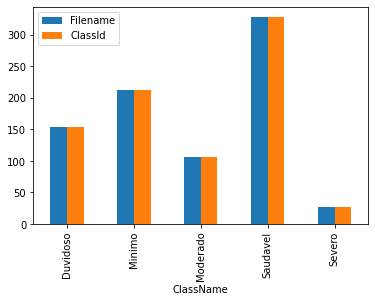

In [20]:
val_df.groupby(['ClassName']).count().plot.bar()

## Análise Test Set

In [21]:
test_image_names = glob.glob(test_path + '/*/*.png')
print("Total number of test images: ", len(test_image_names))
test_image_names = pd.Series(test_image_names)

# test_df: a dataframe with 2 field: Filename, ClassId
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map(lambda img_name: img_name.split(os.sep)[-1])

# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

test_df['ClassName'] = test_df.apply(lambda row: findClassName(row), axis=1)
test_df.groupby('ClassName').count()

Total number of test images:  1656


,Filename,ClassId
ClassName,,
Duvidoso,296,296
Minimo,447,447
Moderado,223,223
Saudavel,639,639
Severo,51,51


<AxesSubplot:xlabel='ClassName'>

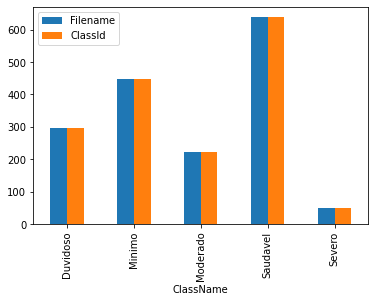

In [22]:
test_df.groupby(['ClassName']).count().plot.bar()

## Carregamento dos Dados

In [23]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from random import seed, sample
seed(42)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #zoom_range=0.2,         # transformação 2: zoom na imagem
    #vertical_flip=True,     # transformação 2: zoom na imagem
    #horizontal_flip=True,   # transformação 3: espelhamento
    rescale = 1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=45,
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

validation_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)


Found 5781 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


## Análise dos Peso das Classes

In [24]:
#
# Balanceamento das classes
#
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(train_generator.classes),  y=train_generator.classes)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

{0: 0.5051114023591088, 1: 1.1053537284894837, 2: 0.762664907651715, 3: 1.5273447820343462, 4: 6.683236994219653}


## Treinamento Modelo Baseline

## Data Augmentation

## Grid de Hyper Parameteros

## Treinamento Modelo 1

## Treinamento Modelo 2

## Resnet50

In [35]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.summary()

for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D()
])

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [26]:
feats_train = frozen_model.predict(train_generator)
feats_val = frozen_model.predict(validation_generator)

26/26 [==============================] - 31s 1s/step


In [29]:
print(feats_train.shape)

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, max_iter=400).fit(feats_train, train_generator.labels)

(5781, 2048)


In [30]:
acc_mlp = clf.score(feats_val, validation_generator.labels)
print("ACC MLP:", acc_mlp)

ACC MLP: 0.4116222760290557


### Resnet50 + dense layers

In [37]:
for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [40]:
from sklearn.metrics import roc_auc_score
#from keras.callbacks import Callback
from tensorflow.keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        # training
        batch_index = 0
        while batch_index <= training_data.batch_index:
            img, label = training_data.next()
            if batch_index ==0:
              img_list = img
              label_list = label
            else:
              img_list = np.concatenate((img_list, img), axis=0)
              label_list = np.concatenate((label_list, label), axis=0)
            batch_index = batch_index + 1
        self.x = img_list
        self.y = label_list

        # validation
        batch_index = 0
        while batch_index <= validation_data.batch_index:
            img, label = validation_data.next()
            if batch_index ==0:
              img_list = img
              label_list = label
            else:
              img_list = np.concatenate((img_list, img), axis=0)
              label_list = np.concatenate((label_list, label), axis=0)
            batch_index = batch_index + 1
        self.x_val = img_list
        self.y_val = label_list


    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        print("SHAPE", y_pred_train.shape)
        roc_train = roc_auc_score(self.y[:,1], y_pred_train[:,1])
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val[:,1], y_pred_val[:,1])
        logs["train_auc"] = roc_train
        logs["val_auc"] = roc_val
        keys = list(logs.keys())
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

In [41]:
roc = RocCallback(training_data=train_generator,
                  validation_data=validation_generator)
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callbacksLst = [roc, early]

In [42]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

frozen_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
frozen_model.fit(train_generator, epochs=25, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/25
181/181 [==============================] - 231s 1s/step
SHAPE (5781, 5)
26/26 [==============================] - 32s 1s/step
roc-auc_train: 0.5067 - roc-auc_val: 0.5192                                                                                                    
181/181 [==============================] - 514s 3s/step - loss: 8.7920 - accuracy: 0.1787 - val_loss: 13.5966 - val_accuracy: 0.0327 - train_auc: 0.5067 - val_auc: 0.5192
Epoch 2/25
181/181 [==============================] - 222s 1s/step
SHAPE (5781, 5)
26/26 [==============================] - 32s 1s/step
roc-auc_train: 0.5103 - roc-auc_val: 0.4842                                                                                                    
181/181 [==============================] - 508s 3s/step - loss: 9.6907 - accuracy: 0.1488 - val_loss: 5.3325 - val_accuracy: 0.3971 - train_auc: 0.5103 - val_auc: 0.4842
Epoch 3/25
181/181 [==============================] - 238s 1s/step
SHAPE (5781, 5)
26/26 [=========

In [43]:
# Avalia o modelo na validação
score = frozen_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 32s 1s/step - loss: 5.3325 - accuracy: 0.3971
Valid loss: 5.332465171813965
Valid acc: 0.3970944285392761


### Resnet + desnse + fine tuning

In [44]:
for layer in model.layers:
    layer.trainable = True

ft_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])    
    
ft_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________


In [45]:
ft_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
ft_model.fit(train_generator, epochs=50, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/50
181/181 [==============================] - 209s 1s/step
SHAPE (5781, 5)
26/26 [==============================] - 31s 1s/step
roc-auc_train: 0.4778 - roc-auc_val: 0.5068                                                                                                    
181/181 [==============================] - 1374s 8s/step - loss: 2.1443 - accuracy: 0.1749 - val_loss: 1.5008 - val_accuracy: 0.2567 - train_auc: 0.4778 - val_auc: 0.5068
Epoch 2/50
181/181 [==============================] - 225s 1s/step
SHAPE (5781, 5)
26/26 [==============================] - 32s 1s/step
roc-auc_train: 0.4745 - roc-auc_val: 0.4927                                                                                                    
181/181 [==============================] - 1382s 8s/step - loss: 1.7150 - accuracy: 0.0683 - val_loss: 40.3748 - val_accuracy: 0.3971 - train_auc: 0.4745 - val_auc: 0.4927
Epoch 3/50
181/181 [==============================] - 238s 1s/step
SHAPE (5781, 5)
26/26 [=======

In [46]:
score = ft_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 34s 1s/step - loss: 1.5008 - accuracy: 0.2567
Valid loss: 1.5007996559143066
Valid acc: 0.2566585838794708


## VGG16

In [47]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.summary()

for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D()
])

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
feats_train = frozen_model.predict(train_generator)
feats_val = frozen_model.predict(validation_generator)

26/26 [==============================] - 57s 2s/step


In [33]:
print(feats_train.shape)

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, max_iter=400).fit(feats_train, train_generator.labels)

(5781, 512)


In [34]:
acc_mlp = clf.score(feats_val, validation_generator.labels)
print("ACC MLP:", acc_mlp)

ACC MLP: 0.4685230024213075


### VGG16 + Dense

In [48]:
for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [49]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

frozen_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
frozen_model.fit(train_generator, epochs=25, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/25
181/181 [==============================] - 416s 2s/step
SHAPE (5781, 5)
26/26 [==============================] - 60s 2s/step
roc-auc_train: 0.4812 - roc-auc_val: 0.4969                                                                                                    
181/181 [==============================] - 963s 5s/step - loss: 2.2909 - accuracy: 0.1975 - val_loss: 3.4897 - val_accuracy: 0.0327 - train_auc: 0.4812 - val_auc: 0.4969
Epoch 2/25
181/181 [==============================] - 412s 2s/step
SHAPE (5781, 5)
26/26 [==============================] - 61s 2s/step
roc-auc_train: 0.4984 - roc-auc_val: 0.5148                                                                                                    
181/181 [==============================] - 951s 5s/step - loss: 2.4044 - accuracy: 0.1835 - val_loss: 2.2559 - val_accuracy: 0.0327 - train_auc: 0.4984 - val_auc: 0.5148
Epoch 3/25
181/181 [==============================] - 431s 2s/step
SHAPE (5781, 5)
26/26 [==========

In [50]:
score = frozen_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 57s 2s/step - loss: 1.4566 - accuracy: 0.2930
Valid loss: 1.4565937519073486
Valid acc: 0.2929781973361969


### VGG + Dense + finetuning

In [51]:
for layer in model.layers:
    layer.trainable = True

ft_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])    
    
ft_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_7   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 14,717,253
Non-trainable params: 0
_________________________________________________________________


In [52]:
ft_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
ft_model.fit(train_generator, epochs=50, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/50
181/181 [==============================] - 399s 2s/step
SHAPE (5781, 5)
26/26 [==============================] - 57s 2s/step
roc-auc_train: 0.4942 - roc-auc_val: 0.4637                                                                                                    
181/181 [==============================] - 2219s 12s/step - loss: 1.8374 - accuracy: 0.1704 - val_loss: 1.6086 - val_accuracy: 0.1852 - train_auc: 0.4942 - val_auc: 0.4637
Epoch 2/50
181/181 [==============================] - 402s 2s/step
SHAPE (5781, 5)
26/26 [==============================] - 58s 2s/step
roc-auc_train: 0.5026 - roc-auc_val: 0.4907                                                                                                    
181/181 [==============================] - 2215s 12s/step - loss: 1.6206 - accuracy: 0.0455 - val_loss: 1.6201 - val_accuracy: 0.0327 - train_auc: 0.5026 - val_auc: 0.4907
Epoch 3/50
181/181 [==============================] - 401s 2s/step
SHAPE (5781, 5)
26/26 [======

In [ ]:
score = ft_model.evaluate(test_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

20/52 [==========>...................] - ETA: 1:25 - loss: 1.6214 - accuracy: 0.0016    